In [1]:
!nvidia-smi

Tue Aug  6 23:13:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.83                 Driver Version: 546.83       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P3              11W /  72W |      0MiB /  6141MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
def confirmed():
  print("Done successfully")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
confirmed()

Done successfully


In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


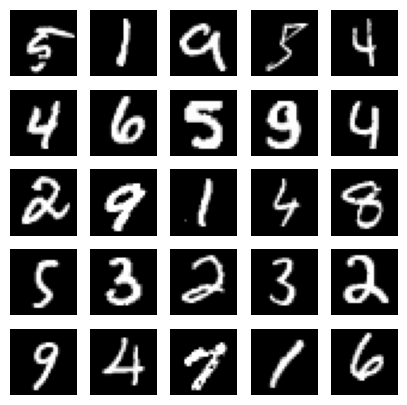

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

confirmed()

Done successfully


In [ ]:
from sklearn.metrics import accuracy_score
confirmed()

Done successfully


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
print(dt_clf.__class__.__name__, accuracy_score(dt_clf.predict(x_test), y_test))

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(penalty="l1", solver="saga", tol=0.1)
log_clf.fit(x_train, y_train)
print(log_clf.__class__.__name__, accuracy_score(log_clf.predict(x_test), y_test))

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss = 'modified_huber')
sgd_clf.fit(x_train, y_train)
print(sgd_clf.__class__.__name__, accuracy_score(sgd_clf.predict(x_test), y_test))

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('dtree', dt_clf), ('log_clf', log_clf), ('sgd', sgd_clf)],
    voting='soft'
)
voting_clf.fit(x_train, y_train)
print(voting_clf.__class__.__name__, accuracy_score(voting_clf.predict(x_test), y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

rnd_clf = RandomForestClassifier()
svc_clf = SVC(probability=True)
ext_clf = ExtraTreesClassifier()
vot_clf = VotingClassifier(
    estimators = [('rndf', rnd_clf), ('svc', svc_clf), ('ext', ext_clf)],
    voting = 'soft',
)

for clf in (rnd_clf, svc_clf, ext_clf, vot_clf):
  clf.fit(x_train, y_train)
  print(clf.__class__.__name__, accuracy_score(clf.predict(x_test), y_test))

X_train_blender = np.c_[rnd_clf.predict(x_test), svc_clf.predict(x_test), ext_clf.predict(x_test)]

X_test_blender = np.c_[rnd_clf.predict(x_test), svc_clf.predict(x_test), ext_clf.predict(x_test)]

svc_blender = SVC()
svc_blender.fit(X_train_blender, y_test)

print(svc_blender.__class__.__name__, accuracy_score(svc_blender.predict(X_test_blender), y_test))

RandomForestClassifier 0.9691
SVC 0.9792
ExtraTreesClassifier 0.973
VotingClassifier 0.9793
SVC 0.9722
